In [173]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_food = r'F:\DataSpell\Pandas_training\kaggle\food\data\fda_approved_food_items_w_nutrient_info.csv'

In [3]:
food = pd.read_csv(path_food, dtype={4: 'str'}, index_col=['fdc_id']).dropna(how='all')

In [4]:
food.nunique()

brand_owner                                     36949
description                                    454848
ingredients                                    386497
gtin_upc                                       595462
serving_size                                     2311
serving_size_unit                                   8
branded_food_category                             426
modified_date                                    2286
available_date                                     43
Calcium, Ca-MG                                   1413
Carbohydrate, by difference-G                    7365
Cholesterol-MG                                    766
Copper, Cu-MG                                     586
Energy-KCAL                                      1411
Fatty acids, total monounsaturated-G             1289
Fatty acids, total polyunsaturated-G             1099
Fatty acids, total saturated-G                   2192
Fatty acids, total trans-G                        452
Fiber, soluble-G            

In [5]:
food['available_date'] = pd.to_datetime(food['available_date'])
food['modified_date'] = pd.to_datetime(food['modified_date'])

In [6]:
# food.to_parquet(r'F:\DataSpell\Pandas_training\kaggle\food\data\fda_approved_food_items_w_nutrient_info.parquet')

In [7]:
food_path = r'F:\DataSpell\Pandas_training\kaggle\food\data\fda_approved_food_items_w_nutrient_info.parquet'

In [8]:
food = pd.read_parquet(food_path)

# 1. Load the data and filter the DataFrame to include only items with more than 5g of protein per serving.

In [9]:
food[food['Protein-G'] > 5]

brand_owner  \
fdc_id                               
1105914  Bush Brothers And Company   
1105915  Bush Brothers And Company   
1105916  Bush Brothers And Company   
1105917            PEPPERIDGE FARM   
1105918      CAMPBELL SOUP COMPANY   
...                            ...   
2662264              Target Stores   
2662265              Target Stores   
2662266              Target Stores   
2662267              Target Stores   
2662268        General Mills, Inc.   

                                               description  \
fdc_id                                                       
1105914  BUSH'S Bourbon and Brown Sugar Grillin' Beans ...   
1105915               BUSH'S Organic Garbanzo Beans 110 oz   
1105916   BUSH'S Smokehouse Tradition Grillin' Beans 22 oz   
1105917                       PEPPERIDGE FARM BREAD TUSCAN   
1105918                       PEPPERIDGE FARM BREAD GARLIC   
...                                                    ...   
2662264  SHARP CHEDDAR REDUCED FAT SHREDDED CHEESE, SHA...   
2662265                HAVARTI DELI SLICED CHEESE, HAVARTI   
2662266  COLBY JACK A BLEND OF COLBY & MONTEREY JACK CH...   
2662267       EXTRA BUTTER MICROWAVE POPCORN, EXTRA BUTTER   
2662268  BEEF & BEEF LIVER BITES WITH SEA SALT, BEEF & ...   

                                               ingredients      gtin_upc  \
fdc_id                                                                     
1105914  Prepared Navy Beans, Water, Brown Sugar, Onion...   39400019107   
1105915      Prepared Organic Chick Peas, Water, Sea Salt.   39400017073   
1105916  Prepared Navy Beans, Water, Brown Sugar. Conta...   39400019121   
1105917  MADE FROM: ENRICHED WHEAT FLOUR (FLOUR, NIACIN...  657522750533   
1105918  MADE FROM: ENRICHED WHEAT FLOUR (FLOUR, NIACIN...   51000076885   
...                                                    ...           ...   
2662264  REDUCED FAT CHEDDAR CHEESE (PASTEURIZED PART-S...   85239112977   
2662265   PASTEURIZED MILK, SALT, CHEESE CULTURE, ENZYMES.   85239113011   
2662266  PASTEURIZED MILK, CHEESE CULTURES, SALT, ENZYM...   85239113059   
2662267  POPCORN, PALM OIL, SALT, NATURAL AND ARTIFICIA...   85239113493   
2662268  BEEF, BEEF LIVER, SEA SALT, BLACK PEPPER, ONIO...  732153028593   

         serving_size serving_size_unit  \
fdc_id                                    
1105914         130.0                 g   
1105915         130.0                 g   
1105916         130.0                 g   
1105917          57.0                 g   
1105918          50.0                 g   
...               ...               ...   
2662264          28.0               GRM   
2662265          20.0               GRM   
2662266          24.0               GRM   
2662267          30.0               GRM   
2662268          28.0               GRM   

                            branded_food_category modified_date  \
fdc_id                                                            
1105914            Vegetables  Prepared/Processed    2020-09-09   
1105915            Vegetables  Prepared/Processed    2020-09-21   
1105916            Vegetables  Prepared/Processed    2020-09-09   
1105917                                     Bread    2020-09-12   
1105918                                     Bread    2020-09-26   
...                                           ...           ...   
2662264                                    Cheese    2023-09-01   
2662265                                    Cheese    2023-09-08   
2662266                                    Cheese    2023-08-31   
2662267  Popcorn, Peanuts, Seeds & Related Snacks    2023-09-01   
2662268                              Other Snacks    2023-09-22   

        available_date  Calcium, Ca-MG  ...  Thiamin-MG  Total lipid (fat)-G  \
fdc_id                                  ...                                    
1105914     2020-11-13            43.0  ...         NaN                 0.35   
1105915     2020-11-13            17.0  ...         NaN     

# 2. Create a new column that classifies the food items into 'High Protein' (>20g) and 'Low Protein' (≤20g).

In [10]:
def show_high_low(row):
  protein = row['Protein-G']
  if protein > 20: return 'High Protein'
  elif protein <= 20: return 'Low Protein'
  
food_protein = food.apply(show_high_low, axis=1)
food.insert(30, 'Protein Content', food_protein)

In [11]:
{index: column for index, column in enumerate(food.columns)}

{0: 'brand_owner',
 1: 'description',
 2: 'ingredients',
 3: 'gtin_upc',
 4: 'serving_size',
 5: 'serving_size_unit',
 6: 'branded_food_category',
 7: 'modified_date',
 8: 'available_date',
 9: 'Calcium, Ca-MG',
 10: 'Carbohydrate, by difference-G',
 11: 'Cholesterol-MG',
 12: 'Copper, Cu-MG',
 13: 'Energy-KCAL',
 14: 'Fatty acids, total monounsaturated-G',
 15: 'Fatty acids, total polyunsaturated-G',
 16: 'Fatty acids, total saturated-G',
 17: 'Fatty acids, total trans-G',
 18: 'Fiber, soluble-G',
 19: 'Fiber, total dietary-G',
 20: 'Folate, total-UG',
 21: 'Folic acid-UG',
 22: 'Iron, Fe-MG',
 23: 'Magnesium, Mg-MG',
 24: 'Manganese, Mn-MG',
 25: 'Niacin-MG',
 26: 'Pantothenic acid-MG',
 27: 'Phosphorus, P-MG',
 28: 'Potassium, K-MG',
 29: 'Protein-G',
 30: 'Protein Content',
 31: 'Riboflavin-MG',
 32: 'Sodium, Na-MG',
 33: 'Sugars, added-G',
 34: 'Sugars, total including NLEA-G',
 35: 'Thiamin-MG',
 36: 'Total lipid (fat)-G',
 37: 'Total sugar alcohols-G',
 38: 'Vitamin A, IU-IU',
 

In [12]:
food[food['Protein-G'] > 20]

brand_owner  \
fdc_id                               
1105996         Seaboard Foods LLC   
1106009  Daily's Premium Meats LLC   
1106021    BRAKEBUSH BROTHERS INC.   
1106034         Brakebush Brothers   
1106037         Brakebush Brothers   
...                            ...   
2662250              Target Stores   
2662251              Target Stores   
2662264              Target Stores   
2662266              Target Stores   
2662268        General Mills, Inc.   

                                               description  \
fdc_id                                                       
1105996                        Boneless Half Loin (Netted)   
1106009  Hardwood Smoked Honey Cured Center Cut Bacon-L...   
1106021  Chicken, FC Original Honey Touched Paddles, 2n...   
1106034  Chicken, Raw Farm Pantry Top Shelf Natural 7 o...   
1106037  Chicken, Ready to Cook, RWA, Natural, Farm Pan...   
...                                                    ...   
2662250               GOUDA CRACKER CUT CHEESE TRAY, GOUDA   
2662251        CRANBERRY CHEDDAR CHEESE, CRANBERRY CHEDDAR   
2662264  SHARP CHEDDAR REDUCED FAT SHREDDED CHEESE, SHA...   
2662266  COLBY JACK A BLEND OF COLBY & MONTEREY JACK CH...   
2662268  BEEF & BEEF LIVER BITES WITH SEA SALT, BEEF & ...   

                                               ingredients        gtin_upc  \
fdc_id                                                                       
1105996  Basted with up to 16% Solution Of Water, Potas...  90736490007580   
1106009  CURED WITH WATER, SALT, SODIUM PHOSPHATE, HONE...     79618352115   
1106021  INGREDIENT: CHICKEN 2ND WING PORTION, WATER, I...  10038034616307   
1106034  Boneless skinless chicken breast fillets conta...  10038034431702   
1106037  contains up to a 12% solution of water & sea s...  10038034433409   
...                                                    ...             ...   
2662250  PASTEURIZED MILK, CHEESE CULTURE, SALT, ENZYME...     85239111482   
2662251  PASTEURIZED GRADE A MILK, CULTURES, CRANBERRIE...     85239111512   
2662264  REDUCED FAT CHEDDAR CHEESE (PASTEURIZED PART-S...     85239112977   
2662266  PASTEURIZED MILK, CHEESE CULTURES, SALT, ENZYM...     85239113059   
2662268  BEEF, BEEF LIVER, SEA SALT, BLACK PEPPER, ONIO...    732153028593   

         serving_size serving_size_unit  \
fdc_id                                    
1105996         112.0                 g   
1106009          17.0                 g   
1106021          73.0                 g   
1106034         198.0                 g   
1106037         113.0                 g   
...               ...               ...   
2662250          28.0               GRM   
2662251          28.0               GRM   
2662264          28.0               GRM   
2662266          24.0               GRM   
2662268          28.0               GRM   

                                     branded_food_category modified_date  \
fdc_id                                                                     
1105996  Meat/Poultry/Other Animals  Unprepared/Unproce...    2020-09-15   
1106009     Meat/Poultry/Other Animals  Prepared/Processed    2020-09-29   
1106021     Meat/Poultry/Other Animals  Prepared/Processed    2020-09-03   
1106034     Meat/Poultry/Other Animals  Prepared/Processed    2020-10-01   
1106037     Meat/Poultry/Other Animals  Prepared/Processed    2020-10-01   
...                                                    ...           ...   
2662250                                             Cheese    2023-09-07   
2662251                                             Cheese    2023-09-15   
2662264                                             Cheese    2023-09-01   
2662266                                             Cheese    2023-08-31   
2662268                                       Other Snacks    2023-09-22   

        available_date  Calcium, Ca-MG  ...  Thiamin-MG  Total lipid (fat)-G  \
fdc_id                                  ...                                  

# 3. Use groupby to find the average amount of Vitamin C across different branded food categories.

In [13]:
food.groupby('branded_food_category')['Vitamin C, total ascorbic acid-MG'].mean().sort_values(ascending=False)

branded_food_category
Vitamins                         5584.533333
Fruit  Prepared/Processed        2354.775148
Herbal Supplements               2128.921739
Specialty Formula Supplements    1519.053754
Amino Acid Supplements           1090.900000
                                    ...     
Wrapped Snacks - Cereal                  NaN
Wrapped Snacks - Fruit Bars              NaN
Wrapped Snacks - Muesli Bars             NaN
Wrapped Snacks - Nut Bars                NaN
Yogurt (Perishable)                      NaN
Name: Vitamin C, total ascorbic acid-MG, Length: 426, dtype: float64

# 4. Generate a pivot table showing the average fat content for each brand owner.

In [14]:
food.pivot_table(index='brand_owner', 
                 values='Total lipid (fat)-G', 
                 aggfunc='mean').sort_values(by='Total lipid (fat)-G', ascending=False)

Total lipid (fat)-G
brand_owner                                    
Vida Imports LLC                    1446.665000
DE RUITER BANKET                    1000.000000
Field Crafts, Inc.                   997.399804
Easy-Up Company                      960.580000
WINIARY                              879.022000
...                                         ...
Prosser's Bar-Be-Que, Inc.             0.000000
Protech Plastics Inc.                  0.000000
Protective Devices Inc.                0.000000
FRUIT HARVEST                          0.000000
DUST CUTTER BEVERAGE CO.               0.000000

[36832 rows x 1 columns]

# 2. Identify and count missing values in each column.

In [19]:
food.isnull().sum()

brand_owner                                      16889
description                                          1
ingredients                                       5391
gtin_upc                                             0
serving_size                                         0
serving_size_unit                                 8247
branded_food_category                            10603
modified_date                                       13
available_date                                       0
Calcium, Ca-MG                                  335949
Carbohydrate, by difference-G                    21125
Cholesterol-MG                                  299325
Copper, Cu-MG                                  1818825
Energy-KCAL                                      31852
Fatty acids, total monounsaturated-G           1608025
Fatty acids, total polyunsaturated-G           1608182
Fatty acids, total saturated-G                  260723
Fatty acids, total trans-G                      300333
Fiber, sol

# 3. Convert modified_date and available_date to datetime type and extract the year and month as new columns.

In [21]:
food.head()

brand_owner  \
fdc_id                                              
1105904  Richardson Oilseed Products (US) Limited   
1105905                     CAMPBELL SOUP COMPANY   
1105906                     CAMPBELL SOUP COMPANY   
1105907                     CAMPBELL SOUP COMPANY   
1105908                     CAMPBELL SOUP COMPANY   

                                         description  \
fdc_id                                                 
1105904                   WESSON Vegetable Oil 1 GAL   
1105905                           SWANSON BROTH BEEF   
1105906     CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER   
1105907  CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI   
1105908                        SWANSON BROTH CHICKEN   

                                               ingredients     gtin_upc  \
fdc_id                                                                    
1105904                                      Vegetable Oil  27000612323   
1105905  INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...  51000198808   
1105906  INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...  51000213273   
1105907  INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...  51000213303   
1105908  INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...  51000224637   

         serving_size serving_size_unit  branded_food_category modified_date  \
fdc_id                                                                         
1105904          15.0                ml            Oils Edible    2020-10-02   
1105905         240.0                ml  Herbs/Spices/Extracts    2020-09-12   
1105906         440.0                 g         Prepared Soups    2020-09-01   
1105907         440.0                 g         Prepared Soups    2020-09-01   
1105908         240.0                ml  Herbs/Spices/Extracts    2020-10-03   

        available_date  Calcium, Ca-MG  ...  Thiamin-MG  Total lipid (fat)-G  \
fdc_id                                  ...                                    
1105904     2020-11-13             0.0  ...         NaN                93.33   
1105905     2020-11-13             0.0  ...         NaN                 0.00   
1105906     2020-11-13            16.0  ...         NaN                 5.31   
1105907     2020-11-13            33.0  ...         NaN                 6.12   
1105908     2020-11-13             4.0  ...         NaN                 0.00   

         Total sugar alcohols-G  Vitamin A, IU-IU  Vitamin B-12-UG  \
fdc_id                                                               
1105904                     NaN               0.0              NaN   
1105905                     NaN               NaN              NaN   
1105906                     NaN               NaN              NaN   
1105907                     NaN               NaN              NaN   
1105908                     NaN               NaN              NaN   

         Vitamin B-6-MG  Vitamin C, total ascorbic acid-MG  \
fdc_id                                                       
1105904             NaN                                0.0   
1105905             NaN                                NaN   
1105906             NaN                                NaN   
1105907             NaN                                NaN   
1105908             NaN                                NaN   

         Vitamin D (D2 + D3), International Units-IU  Vitamin D (D2 + D3)-UG  \
fdc_id                                                                         
1105904                                          0.0                     NaN   
1105905                                          0.0                     NaN   
1105906                                          0.0                     NaN   
1105907                                          0.0                     NaN   
1105908                                          0.0                     NaN   

         Zinc, Zn-MG  
fdc_id                
1105904          NaN  
1105905          NaN  
1105906          NaN  
1105907          NaN  


In [38]:
# year = pd.to_numeric(food['modified_date'].dt.year.fillna(0).astype(int), downcast='unsigned')
year_month_modified = food['modified_date'].dt.to_period('M')
year_month_available = food['available_date'].dt.to_period('M')
food.insert(8, 'modified_year_month', year_month_modified)

In [40]:
food.insert(10, 'available_year_month', year_month_available)

In [41]:
food.head()

brand_owner  \
fdc_id                                              
1105904  Richardson Oilseed Products (US) Limited   
1105905                     CAMPBELL SOUP COMPANY   
1105906                     CAMPBELL SOUP COMPANY   
1105907                     CAMPBELL SOUP COMPANY   
1105908                     CAMPBELL SOUP COMPANY   

                                         description  \
fdc_id                                                 
1105904                   WESSON Vegetable Oil 1 GAL   
1105905                           SWANSON BROTH BEEF   
1105906     CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER   
1105907  CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI   
1105908                        SWANSON BROTH CHICKEN   

                                               ingredients     gtin_upc  \
fdc_id                                                                    
1105904                                      Vegetable Oil  27000612323   
1105905  INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...  51000198808   
1105906  INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...  51000213273   
1105907  INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...  51000213303   
1105908  INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...  51000224637   

         serving_size serving_size_unit  branded_food_category modified_date  \
fdc_id                                                                         
1105904          15.0                ml            Oils Edible    2020-10-02   
1105905         240.0                ml  Herbs/Spices/Extracts    2020-09-12   
1105906         440.0                 g         Prepared Soups    2020-09-01   
1105907         440.0                 g         Prepared Soups    2020-09-01   
1105908         240.0                ml  Herbs/Spices/Extracts    2020-10-03   

        modified_year_month available_date  ... Thiamin-MG  \
fdc_id                                      ...              
1105904             2020-10     2020-11-13  ...        NaN   
1105905             2020-09     2020-11-13  ...        NaN   
1105906             2020-09     2020-11-13  ...        NaN   
1105907             2020-09     2020-11-13  ...        NaN   
1105908             2020-10     2020-11-13  ...        NaN   

         Total lipid (fat)-G  Total sugar alcohols-G  Vitamin A, IU-IU  \
fdc_id                                                                   
1105904                93.33                     NaN               0.0   
1105905                 0.00                     NaN               NaN   
1105906                 5.31                     NaN               NaN   
1105907                 6.12                     NaN               NaN   
1105908                 0.00                     NaN               NaN   

         Vitamin B-12-UG  Vitamin B-6-MG  Vitamin C, total ascorbic acid-MG  \
fdc_id                                                                        
1105904              NaN             NaN                                0.0   
1105905              NaN             NaN                                NaN   
1105906              NaN             NaN                                NaN   
1105907              NaN             NaN                                NaN   
1105908              NaN             NaN                                NaN   

         Vitamin D (D2 + D3), International Units-IU  Vitamin D (D2 + D3)-UG  \
fdc_id                                                                         
1105904                                          0.0                     NaN   
1105905                                          0.0                     NaN   
1105906                                          0.0                     NaN   
1105907                                          0.0                     NaN   
1105908                                          0.0                     NaN   

         Zinc, Zn-MG  
fdc_id                
1105904          NaN  
1105905          NaN  
1105906          NaN  
11

In [46]:
index_name = {index: name for index, name in enumerate(food.columns)}

# 4. Filter items with trans fat greater than 0 and saturated fat greater than 5g.

In [43]:
food.head()

brand_owner  \
fdc_id                                              
1105904  Richardson Oilseed Products (US) Limited   
1105905                     CAMPBELL SOUP COMPANY   
1105906                     CAMPBELL SOUP COMPANY   
1105907                     CAMPBELL SOUP COMPANY   
1105908                     CAMPBELL SOUP COMPANY   

                                         description  \
fdc_id                                                 
1105904                   WESSON Vegetable Oil 1 GAL   
1105905                           SWANSON BROTH BEEF   
1105906     CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER   
1105907  CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI   
1105908                        SWANSON BROTH CHICKEN   

                                               ingredients     gtin_upc  \
fdc_id                                                                    
1105904                                      Vegetable Oil  27000612323   
1105905  INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...  51000198808   
1105906  INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...  51000213273   
1105907  INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...  51000213303   
1105908  INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN...  51000224637   

         serving_size serving_size_unit  branded_food_category modified_date  \
fdc_id                                                                         
1105904          15.0                ml            Oils Edible    2020-10-02   
1105905         240.0                ml  Herbs/Spices/Extracts    2020-09-12   
1105906         440.0                 g         Prepared Soups    2020-09-01   
1105907         440.0                 g         Prepared Soups    2020-09-01   
1105908         240.0                ml  Herbs/Spices/Extracts    2020-10-03   

        modified_year_month available_date  ... Thiamin-MG  \
fdc_id                                      ...              
1105904             2020-10     2020-11-13  ...        NaN   
1105905             2020-09     2020-11-13  ...        NaN   
1105906             2020-09     2020-11-13  ...        NaN   
1105907             2020-09     2020-11-13  ...        NaN   
1105908             2020-10     2020-11-13  ...        NaN   

         Total lipid (fat)-G  Total sugar alcohols-G  Vitamin A, IU-IU  \
fdc_id                                                                   
1105904                93.33                     NaN               0.0   
1105905                 0.00                     NaN               NaN   
1105906                 5.31                     NaN               NaN   
1105907                 6.12                     NaN               NaN   
1105908                 0.00                     NaN               NaN   

         Vitamin B-12-UG  Vitamin B-6-MG  Vitamin C, total ascorbic acid-MG  \
fdc_id                                                                        
1105904              NaN             NaN                                0.0   
1105905              NaN             NaN                                NaN   
1105906              NaN             NaN                                NaN   
1105907              NaN             NaN                                NaN   
1105908              NaN             NaN                                NaN   

         Vitamin D (D2 + D3), International Units-IU  Vitamin D (D2 + D3)-UG  \
fdc_id                                                                         
1105904                                          0.0                     NaN   
1105905                                          0.0                     NaN   
1105906                                          0.0                     NaN   
1105907                                          0.0                     NaN   
1105908                                          0.0                     NaN   

         Zinc, Zn-MG  
fdc_id                
1105904          NaN  
1105905          NaN  
1105906          NaN  
11

In [45]:
food[(food['Fatty acids, total saturated-G'] > 5) & (food['Fatty acids, total trans-G'] > 0)]

brand_owner  \
fdc_id                                    
1106197           Ventura Foods, L.L.C.   
1106425              Dean Foods Company   
1106461  Flanders Provision Company LLC   
1106462  Flanders Provision Company LLC   
1106743              Dean Foods Company   
...                                 ...   
2661287                   Target Stores   
2661449                   Target Stores   
2661855                   Target Stores   
2661939                   Target Stores   
2662110                   Target Stores   

                                               description  \
fdc_id                                                       
1106197                               VEGETABLE OIL SPREAD   
1106425  SOUTHERN BANANA PUDDING ICE CREAM, SOUTHERN BA...   
1106461          VIDALIA ONION BEEF PATTIES, VIDALIA ONION   
1106462                      CLASSIC BEEF PATTIES, CLASSIC   
1106743  SMALL BATCH BOURBON VANILLA ICE CREAM, SMALL B...   
...                                                    ...   
2661287                     HOMESTYLE MEATBALLS, HOMESTYLE   
2661449       MOLTEN CHOCOLATE LAVA CAKE, MOLTEN CHOCOLATE   
2661855          NEW YORK-STYLE CHEESECAKE, NEW YORK-STYLE   
2661939  CHOCOLATE CHEESECAKE SAMPLER WITH CHOCOLATE CH...   
2662110  SIMPLY BALANCED, ORGANIC 100% GRASSFED GROUND ...   

                                               ingredients      gtin_upc  \
fdc_id                                                                     
1106197  LIQUID AND PARTIALLY HYDROGENATED SOYBEAN OIL,...   26700147043   
1106425  CREAM, MILK, NONFAT MILK, CANE SUGAR, BANANA P...  815116010160   
1106461  BEEF, WATER, BEEF HEARTS, VIDALIA ONION, TEXTU...   20323003625   
1106462  BEEF, WATER, BEEF HEARTS, TEXTURED SOY FLOUR, ...   20323005148   
1106743  CREAM, MILK, NONFAT MILK, CANE SUGAR, VANILLA ...  815116010023   
...                                                    ...           ...   
2661287  BEEF AND PORK, WATER, BREAD CRUMBS (ENRICHED F...   85239020968   
2661449  SUGAR, EGGS, WATER, BLEACHED ENRICHED WHEAT FL...   85239157800   
2661855  CREAM CHEESE (PASTEURIZED MILK AND CREAM, CHEE...   85239092019   
2661939  CHOCOLATE CHIP - PASTEURIZED MILK & CREAM, SUG...   85239096857   
2662110                                      ORGANIC BEEF.   85239122860   

         serving_size serving_size_unit          branded_food_category  \
fdc_id                                                                   
1106197          14.0                 g                Butter & Spread   
1106425         141.0                 g      Ice Cream & Frozen Yogurt   
1106461         114.0                 g     Frozen Patties and Burgers   
1106462         114.0                 g     Frozen Patties and Burgers   
1106743         141.0                 g      Ice Cream & Frozen Yogurt   
...               ...               ...                            ...   
2661287          85.0               GRM  Frozen Bacon, Sausages & Ribs   
2661449         114.0               GRM          Other Frozen Desserts   
2661855         119.0               GRM          Other Frozen Desserts   
2661939         113.0               GRM   Cakes, Cupcakes, Snack Cakes   
2662110         112.0               GRM                    Other Meats   

        modified_date modified_year_month available_date  ... Thiamin-MG  \
fdc_id                                                    ...              
1106197    2020-04-26             2020-04     2020-11-13  ...        NaN   
1106425    2020-04-26             2020-04     2020-11-13  ...        NaN   
1106461    2020-04-14             2020-04     2020-11-13  ...        NaN   
1106462    2020-04-08             2020-04     2020-11-13  ...        NaN   
1106743    2020-04-26             2020-04     2020-11-13  ...        NaN   
...               ...                 ...            ...  ...        ...   
2661287    2023-09-08             2023-09     2023-10-26  ...        NaN   
2661449    2023-08-21    

# 5. Group by branded_food_category and calculate the average Energy-KCAL.

In [51]:
[value for value in index_name.values() if 'KCAL' in value]

['Energy-KCAL']

In [54]:
food.groupby('branded_food_category')['Energy-KCAL'].mean().sort_values(ascending=False)

branded_food_category
Grains/Cereal - Ready to Eat - (Shelf Stable)      2579.750000
Vegetables - Prepared/Processed (Frozen)           2299.812500
Vegetables - Prepared/Processed (Shelf Stable)     1932.526316
Ayurvedic Supplements                              1333.000000
Oils Edible - Vegetable or Plant (Shelf Stable)     857.000000
                                                      ...     
Peppers                                               0.000000
Packaged Water                                        0.000000
Gardening                                             0.000000
Minerals                                              0.000000
Baby/Infant – Foods/Beverages                              NaN
Name: Energy-KCAL, Length: 426, dtype: float64

# 6. Create a pivot table showing average Fiber, total dietary-G for each brand_owner.

In [69]:
food.pivot_table(index='brand_owner', values='Fiber, total dietary-G', aggfunc='mean').sort_values(ascending=False, by='Fiber, total dietary-G')

Fiber, total dietary-G
brand_owner                                          
NESTLE MEXICO. S.A.                       1730.000000
Rileys All Purpose Seasoning               625.000000
Sands Impex                                319.282353
Morton Bassett Inc.                        198.433333
Morton Salt, Inc.                          181.800000
...                                               ...
JBN Group LLC                                0.000000
RIVO                                         0.000000
RIZO BROS CALIFORNIA CREAMERY                0.000000
RIZO LOPEZ FOODS                             0.000000
zoe's meats inc                              0.000000

[32058 rows x 1 columns]

# 7. Sort items by Cholesterol-MG in descending order, only for items with cholesterol greater than 0mg.

In [61]:
food['']

['Fiber, soluble-G', 'Fiber, total dietary-G']

In [70]:
def check_column(name_checking):
  return [value for value in index_name.values() if name_checking in value]

In [79]:
food_cholesterol_mg = food[food['Cholesterol-MG'] > 0]
food_cholesterol_mg['Cholesterol-MG'].sort_values(ascending=False)
# food['Cholesterol-MG'].sort_values(ascending=False)

fdc_id
2273390    5500000.0
2381090    1023810.0
2413012     833333.0
2400333     716667.0
2182355     666667.0
             ...    
1838100          1.0
2237968          1.0
2655012          1.0
2007546          1.0
1847930          1.0
Name: Cholesterol-MG, Length: 654134, dtype: float64

# 8. Calculate the percentage of total fats (Total lipid (fat)-G) of the serving_size for each item.

In [87]:
fat_percentage = food['Total lipid (fat)-G'] / food['serving_size'] * 100
food.insert(39, 'fat_percentage', fat_percentage)

# 9. Identify food items that do not list Vitamin C or D (i.e., NaN values) and replace them with 0.

In [93]:
check_column('Vitamin D')

['Vitamin D (D2 + D3), International Units-IU', 'Vitamin D (D2 + D3)-UG']

In [96]:
food['Vitamin C, total ascorbic acid-MG'] = food['Vitamin C, total ascorbic acid-MG'].fillna(0).astype(float)
food['Vitamin D (D2 + D3), International Units-IU'] = (food['Vitamin D (D2 + D3), International Units-IU'].fillna(0)
                                                     .astype(float))
food['Vitamin D (D2 + D3)-UG'] = food['Vitamin D (D2 + D3)-UG'].fillna(0).astype(float)

# 10. Use a boolean mask to find all items with more than 10g of dietary fiber and less than 5mg of sodium.

In [101]:
food[(food['Fiber, total dietary-G'] > 10) & (food['Sodium, Na-MG'] < 5)]

brand_owner  \
fdc_id                                         
1106206              Nutcracker Brands, Inc.   
1106436                 Garden of Light Inc.   
1106519               Cream of the West Inc.   
1106567                       Taza Chocolate   
1106568  The Endangered Species Chocolate Co   
...                                      ...   
2660858                        Target Stores   
2661058                        Target Stores   
2661126                        Target Stores   
2662000                        Target Stores   
2662025                        Target Stores   

                                               description  \
fdc_id                                                       
1106206                                  SUNFLOWER KERNELS   
1106436  UNSWEETENED WITH ANCIENT GRAINS QUINOA & AMARA...   
1106519   MONTANA'S, CREAM OF THE WEST, 100% ROASTED WHEAT   
1106567  CACAO CRUNCH ORGANIC 80% DARK CHOCOLATE, CACAO...   
1106568  72% COCOA CRANBERRIES ALMONDS + DARK CHOCOLATE...   
...                                                    ...   
2660858                            BLACKEYE PEAS, BLACKEYE   
2661058               STRAWBERRY SLICES FREEZE DRIED FRUIT   
2661126  DARK CHOCOLATE ORGANIC 72% CACAO CHUNKS, DARK ...   
2662000                       BLUEBERRY FREEZE DRIED FRUIT   
2662025                      FREEZE DRIED FRUIT, RASPBERRY   

                                               ingredients      gtin_upc  \
fdc_id                                                                     
1106206  INGREDIENTS: SUNFLOWER KERNELS, VEGETABLE OIL,...   41616043401   
1106436  WHOLE GRAIN OATS, FLAX MEAL, CHIA SEEDS, QUINO...  835228007537   
1106519                                   HARD RED WHEAT.    38328111832   
1106567  ORGANIC CACAO BEANS, ORGANIC CANE SUGAR, ORGAN...  856072004459   
1106568  BITTERSWEET CHOCOLATE (CHOCOLATE LIQUOR, SUGAR...   37014242300   
...                                                    ...           ...   
2660858                                     BLACKEYE PEAS.   85239053010   
2661058                                      STRAWBERRIES.   85239013038   
2661126  ORGANIC UNSWEETENED CHOCOLATE, ORGANIC CANE SU...   85239002773   
2662000               FREEZE DRIED CULTIVATED BLUEBERRIES.   85239071915   
2662025                          FREEZE DRIED RASPBERRIES.   85239071908   

         serving_size serving_size_unit  \
fdc_id                                    
1106206          28.0                 g   
1106436          50.0                 g   
1106519          48.0                 g   
1106567          35.0                 g   
1106568          28.0                 g   
...               ...               ...   
2660858          35.0               GRM   
2661058          15.0               GRM   
2661126          15.0               GRM   
2662000          56.0               GRM   
2662025          35.0               GRM   

                            branded_food_category modified_date  \
fdc_id                                                            
1106206  Popcorn, Peanuts, Seeds & Related Snacks    2020-04-26   
1106436                                    Cereal    2020-04-08   
1106519                                    Cereal    2020-04-21   
1106567                                 Chocolate    2020-04-24   
1106568                                 Chocolate    2020-04-15   
...                                           ...           ...   
2660858                Vegetable and Lentil Mixes    2023-09-20   
2661058                          Wholesome Snacks    2023-09-06   
2661126     Baking Decorations & Dessert Toppings    2023-09-06   
2662000                          Wholesome Snacks    2023-09-06   
2662025                          Wholesome Snacks    2023-09-06   

        modified_year_month available_date  ... Total lipid (fat)-G  \
fdc_id                                      ...                       
1106206             2020-04     2020-1

# 11. Calculate the median of Calcium, Ca-MG for each year based on modified_date.

In [109]:
year = food['modified_date'].dt.year
food.groupby(year)['Calcium, Ca-MG'].median().sort_index(ascending=True)

modified_date
2013.0     NaN
2014.0     NaN
2015.0     0.0
2016.0    32.5
2017.0    36.0
2018.0    35.0
2019.0    33.0
2020.0    37.0
2021.0    40.0
2022.0    40.0
2023.0    40.0
Name: Calcium, Ca-MG, dtype: float64

# 12. Filter items that were modified in the most recent year available in the dataset.

In [113]:
most_recent_year = food['modified_date'].dt.year.max()
recently_modified_food = food[food['modified_date'].dt.year == most_recent_year]
recently_modified_food

brand_owner  \
fdc_id                         
2443433   Kellogg Company US   
2443454  Snyder's-Lance INC.   
2443472  Snyder's-Lance INC.   
2443473  Snyder's-Lance INC.   
2443476  Snyder's-Lance INC.   
...                      ...   
2662264        Target Stores   
2662265        Target Stores   
2662266        Target Stores   
2662267        Target Stores   
2662268  General Mills, Inc.   

                                               description  \
fdc_id                                                       
2443433        Kellogg's Apple Jacks Cereal Original 1.5oz   
2443454  Snyder's of Hanover Pretzel Pieces, Parmesan G...   
2443472  Snyder's of Hanover, Seasoned Twisted Pretzel ...   
2443473  Snyder's of Hanover, Seasoned Twisted Pretzel ...   
2443476  Snyder's of Hanover Mini Pretzels, 40 Oz Canister   
...                                                    ...   
2662264  SHARP CHEDDAR REDUCED FAT SHREDDED CHEESE, SHA...   
2662265                HAVARTI DELI SLICED CHEESE, HAVARTI   
2662266  COLBY JACK A BLEND OF COLBY & MONTEREY JACK CH...   
2662267       EXTRA BUTTER MICROWAVE POPCORN, EXTRA BUTTER   
2662268  BEEF & BEEF LIVER BITES WITH SEA SALT, BEEF & ...   

                                               ingredients      gtin_upc  \
fdc_id                                                                     
2443433  INGREDIENTS: CORN FLOUR BLEND (whole grain yel...   38000863509   
2443454  INGREDIENTS: ENRICHED FLOUR (WHEAT FLOUR, NIAC...   77975095164   
2443472  INGREDIENTS: ENRICHED FLOUR (WHEAT FLOUR, NIAC...   77975095584   
2443473  INGREDIENTS: ENRICHED FLOUR (WHEAT FLOUR, NIAC...   77975094372   
2443476  INGREDIENTS: Enriched Flour (Wheat Flour, Niac...   77975094518   
...                                                    ...           ...   
2662264  REDUCED FAT CHEDDAR CHEESE (PASTEURIZED PART-S...   85239112977   
2662265   PASTEURIZED MILK, SALT, CHEESE CULTURE, ENZYMES.   85239113011   
2662266  PASTEURIZED MILK, CHEESE CULTURES, SALT, ENZYM...   85239113059   
2662267  POPCORN, PALM OIL, SALT, NATURAL AND ARTIFICIA...   85239113493   
2662268  BEEF, BEEF LIVER, SEA SALT, BLACK PEPPER, ONIO...  732153028593   

         serving_size serving_size_unit  \
fdc_id                                    
2443433          42.0                 g   
2443454          28.0                 g   
2443472          28.0                 g   
2443473          28.0                 g   
2443476          28.0                 g   
...               ...               ...   
2662264          28.0               GRM   
2662265          20.0               GRM   
2662266          24.0               GRM   
2662267          30.0               GRM   
2662268          28.0               GRM   

                            branded_food_category modified_date  \
fdc_id                                                            
2443433                 Processed Cereal Products    2023-01-02   
2443454                                    Snacks    2023-01-01   
2443472                                    Snacks    2023-01-01   
2443473                                    Snacks    2023-01-01   
2443476                                    Snacks    2023-01-01   
...                                           ...           ...   
2662264                                    Cheese    2023-09-01   
2662265                                    Cheese    2023-09-08   
2662266                                    Cheese    2023-08-31   
2662267  Popcorn, Peanuts, Seeds & Related Snacks    2023-09-01   
2662268                              Other Snacks    2023-09-22   

        modified_year_month available_date  ... Total lipid (fat)-G  \
fdc_id                                      ...                       
2443433             2023-01     2023-01-26  ...                3.80   
2443454             2023-01     2023-01-26  ...               25.00   
2443472             2023-01     2023-01-26  ...               17.86   
2443473          

# 13. Use .apply() to normalize the Energy-KCAL column (subtract the mean and divide by the standard deviation).

In [115]:
mean_energy = food['Energy-KCAL'].mean()
std_energy = food['Energy-KCAL'].std()

food['Energy-KCAL'].apply(lambda x: (x - mean_energy) / std_energy)

fdc_id
1105904    1.638190
1105905   -0.746614
1105906   -0.531069
1105907   -0.531069
1105908   -0.746614
             ...   
2662264    0.129380
2662265    0.347688
2662266    0.278603
2662267    0.624026
2662268    0.129380
Name: Energy-KCAL, Length: 1841897, dtype: float64

# 14. Find all unique ingredients and their frequencies across the dataset.

In [123]:
food['ingredients'].value_counts(ascending=False)

ingredients
CARBONATED WATER, NATURAL FLAVOR.                                                                                                                                                                                                                                                                                                                                                                                                                    2879
Pork                                                                                                                                                                                                                                                                                                                                                                                                                                                 2193
ALMONDS.                                                                                                

# 15. Merge this dataset with another dataset based on fdc_id.

In [124]:
# merged_data = pd.merge(food, other_dataset, on='fdc_id')

# 16. Calculate the interquartile range for Carbohydrate, by difference-G across the dataset.

In [126]:
Q1 = food['Carbohydrate, by difference-G'].quantile(0.25)
Q3 = food['Carbohydrate, by difference-G'].quantile(0.75)
IQR = Q3 - Q1
IQR

53.33

# 17. Create a new column that categorizes Total lipid (fat)-G into low, medium, and high fat.

In [135]:
total_lipid_low_high = pd.cut(food['Total lipid (fat)-G'], bins=3, labels=['low', 'medium', 'high'])

{0: 'brand_owner',
 1: 'description',
 2: 'ingredients',
 3: 'gtin_upc',
 4: 'serving_size',
 5: 'serving_size_unit',
 6: 'branded_food_category',
 7: 'modified_date',
 8: 'modified_year_month',
 9: 'available_date',
 10: 'available_year_month',
 11: 'Calcium, Ca-MG',
 12: 'Carbohydrate, by difference-G',
 13: 'Cholesterol-MG',
 14: 'Copper, Cu-MG',
 15: 'Energy-KCAL',
 16: 'Fatty acids, total monounsaturated-G',
 17: 'Fatty acids, total polyunsaturated-G',
 18: 'Fatty acids, total saturated-G',
 19: 'Fatty acids, total trans-G',
 20: 'Fiber, soluble-G',
 21: 'Fiber, total dietary-G',
 22: 'Folate, total-UG',
 23: 'Folic acid-UG',
 24: 'Iron, Fe-MG',
 25: 'Magnesium, Mg-MG',
 26: 'Manganese, Mn-MG',
 27: 'Niacin-MG',
 28: 'Pantothenic acid-MG',
 29: 'Phosphorus, P-MG',
 30: 'Potassium, K-MG',
 31: 'Protein-G',
 32: 'Protein Content',
 33: 'Riboflavin-MG',
 34: 'Sodium, Na-MG',
 35: 'Sugars, added-G',
 36: 'Sugars, total including NLEA-G',
 37: 'Thiamin-MG',
 38: 'Total lipid (fat)-G',


In [136]:
food.insert(39, 'Fat Category', total_lipid_low_high)

In [137]:
food['Fat Category']

fdc_id
1105904    low
1105905    low
1105906    low
1105907    low
1105908    low
          ... 
2662264    low
2662265    low
2662266    low
2662267    low
2662268    low
Name: Categorizes Total lipid, Length: 1841897, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

# 18. Detect and remove outliers in the Sodium, Na-MG column using the Z-score method.

In [138]:
from scipy.stats import zscore

# Calculate Z-scores
food['Sodium_Zscore'] = zscore(food['Sodium, Na-MG'])

# Filter rows with Z-score less than absolute 3
food_no_outliers = food[food['Sodium_Zscore'].abs() < 3]

# Drop the Z-score column as it's no longer needed
food_no_outliers = food_no_outliers.drop(columns=['Sodium_Zscore'])
food_no_outliers

Empty DataFrame
Columns: [brand_owner, description, ingredients, gtin_upc, serving_size, serving_size_unit, branded_food_category, modified_date, modified_year_month, available_date, available_year_month, Calcium, Ca-MG, Carbohydrate, by difference-G, Cholesterol-MG, Copper, Cu-MG, Energy-KCAL, Fatty acids, total monounsaturated-G, Fatty acids, total polyunsaturated-G, Fatty acids, total saturated-G, Fatty acids, total trans-G, Fiber, soluble-G, Fiber, total dietary-G, Folate, total-UG, Folic acid-UG, Iron, Fe-MG, Magnesium, Mg-MG, Manganese, Mn-MG, Niacin-MG, Pantothenic acid-MG, Phosphorus, P-MG, Potassium, K-MG, Protein-G, Protein Content, Riboflavin-MG, Sodium, Na-MG, Sugars, added-G, Sugars, total including NLEA-G, Thiamin-MG, Total lipid (fat)-G, Categorizes Total lipid, fat_percentage, Total sugar alcohols-G, Vitamin A, IU-IU, Vitamin B-12-UG, Vitamin B-6-MG, Vitamin C, total ascorbic acid-MG, Vitamin D (D2 + D3), International Units-IU, Vitamin D (D2 + D3)-UG, Zinc, Zn-MG]
Index: []

[0 rows x 49 columns]

# 20. Create a bar plot of the number of items per branded_food_category using only Pandas plotting capabilities.

In [142]:
# # Count the number of items in each category
# category_counts = food['branded_food_category'].value_counts()
# 
# # Create a bar plot
# category_counts.plot(kind='bar', figsize=(10, 6))
# 
# # Set the title and labels
# plt.title('Number of Items per Branded Food Category')
# plt.xlabel('Branded Food Category')
# plt.ylabel('Number of Items')
# 
# # Show the plot
# plt.show()

# 1. Plot the distribution of Energy-KCAL using a histogram.

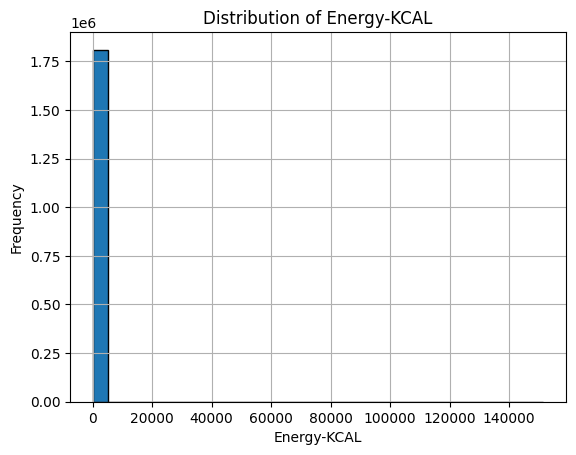

In [151]:
food['Energy-KCAL'].hist(bins=30, edgecolor='black')

plt.title('Distribution of Energy-KCAL')
plt.xlabel('Energy-KCAL')
plt.ylabel('Frequency')

plt.show()

# 2. Create a scatter plot showing the relationship between Total lipid (fat)-G and Cholesterol-MG.

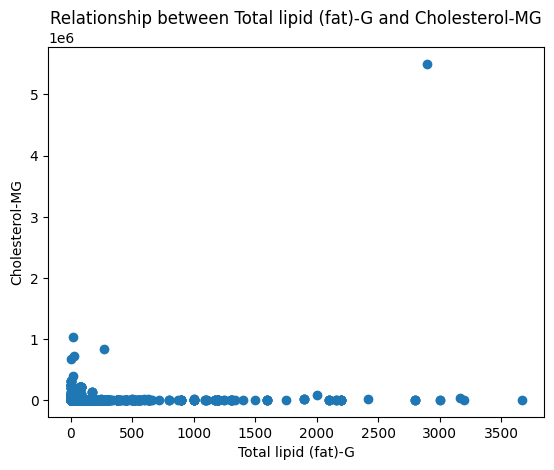

In [156]:
plt.scatter(food['Total lipid (fat)-G'], food['Cholesterol-MG'])

plt.title('Relationship between Total lipid (fat)-G and Cholesterol-MG')
plt.xlabel('Total lipid (fat)-G')
plt.ylabel('Cholesterol-MG')

plt.show()

# 3. Plot a line graph showing the trend of Calcium, Ca-MG changes over time.

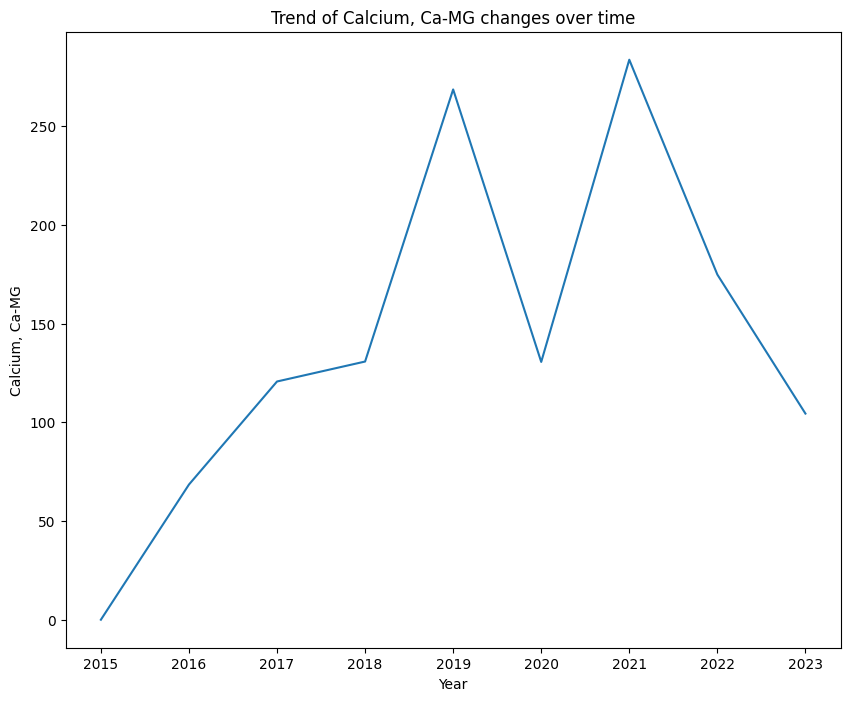

In [158]:
calcium_trend = food.groupby(food['modified_date'].dt.year)['Calcium, Ca-MG'].mean()

plt.figure(figsize=(10, 8))
plt.plot(calcium_trend.index, calcium_trend.values)

plt.title('Trend of Calcium, Ca-MG changes over time')
plt.xlabel('Year')
plt.ylabel('Calcium, Ca-MG')

plt.show()

# 4. Generate a bar chart comparing the average Sodium, Na-MG across different branded_food_category.

Text(0, 0.5, 'Average Sodium, Na-MG')

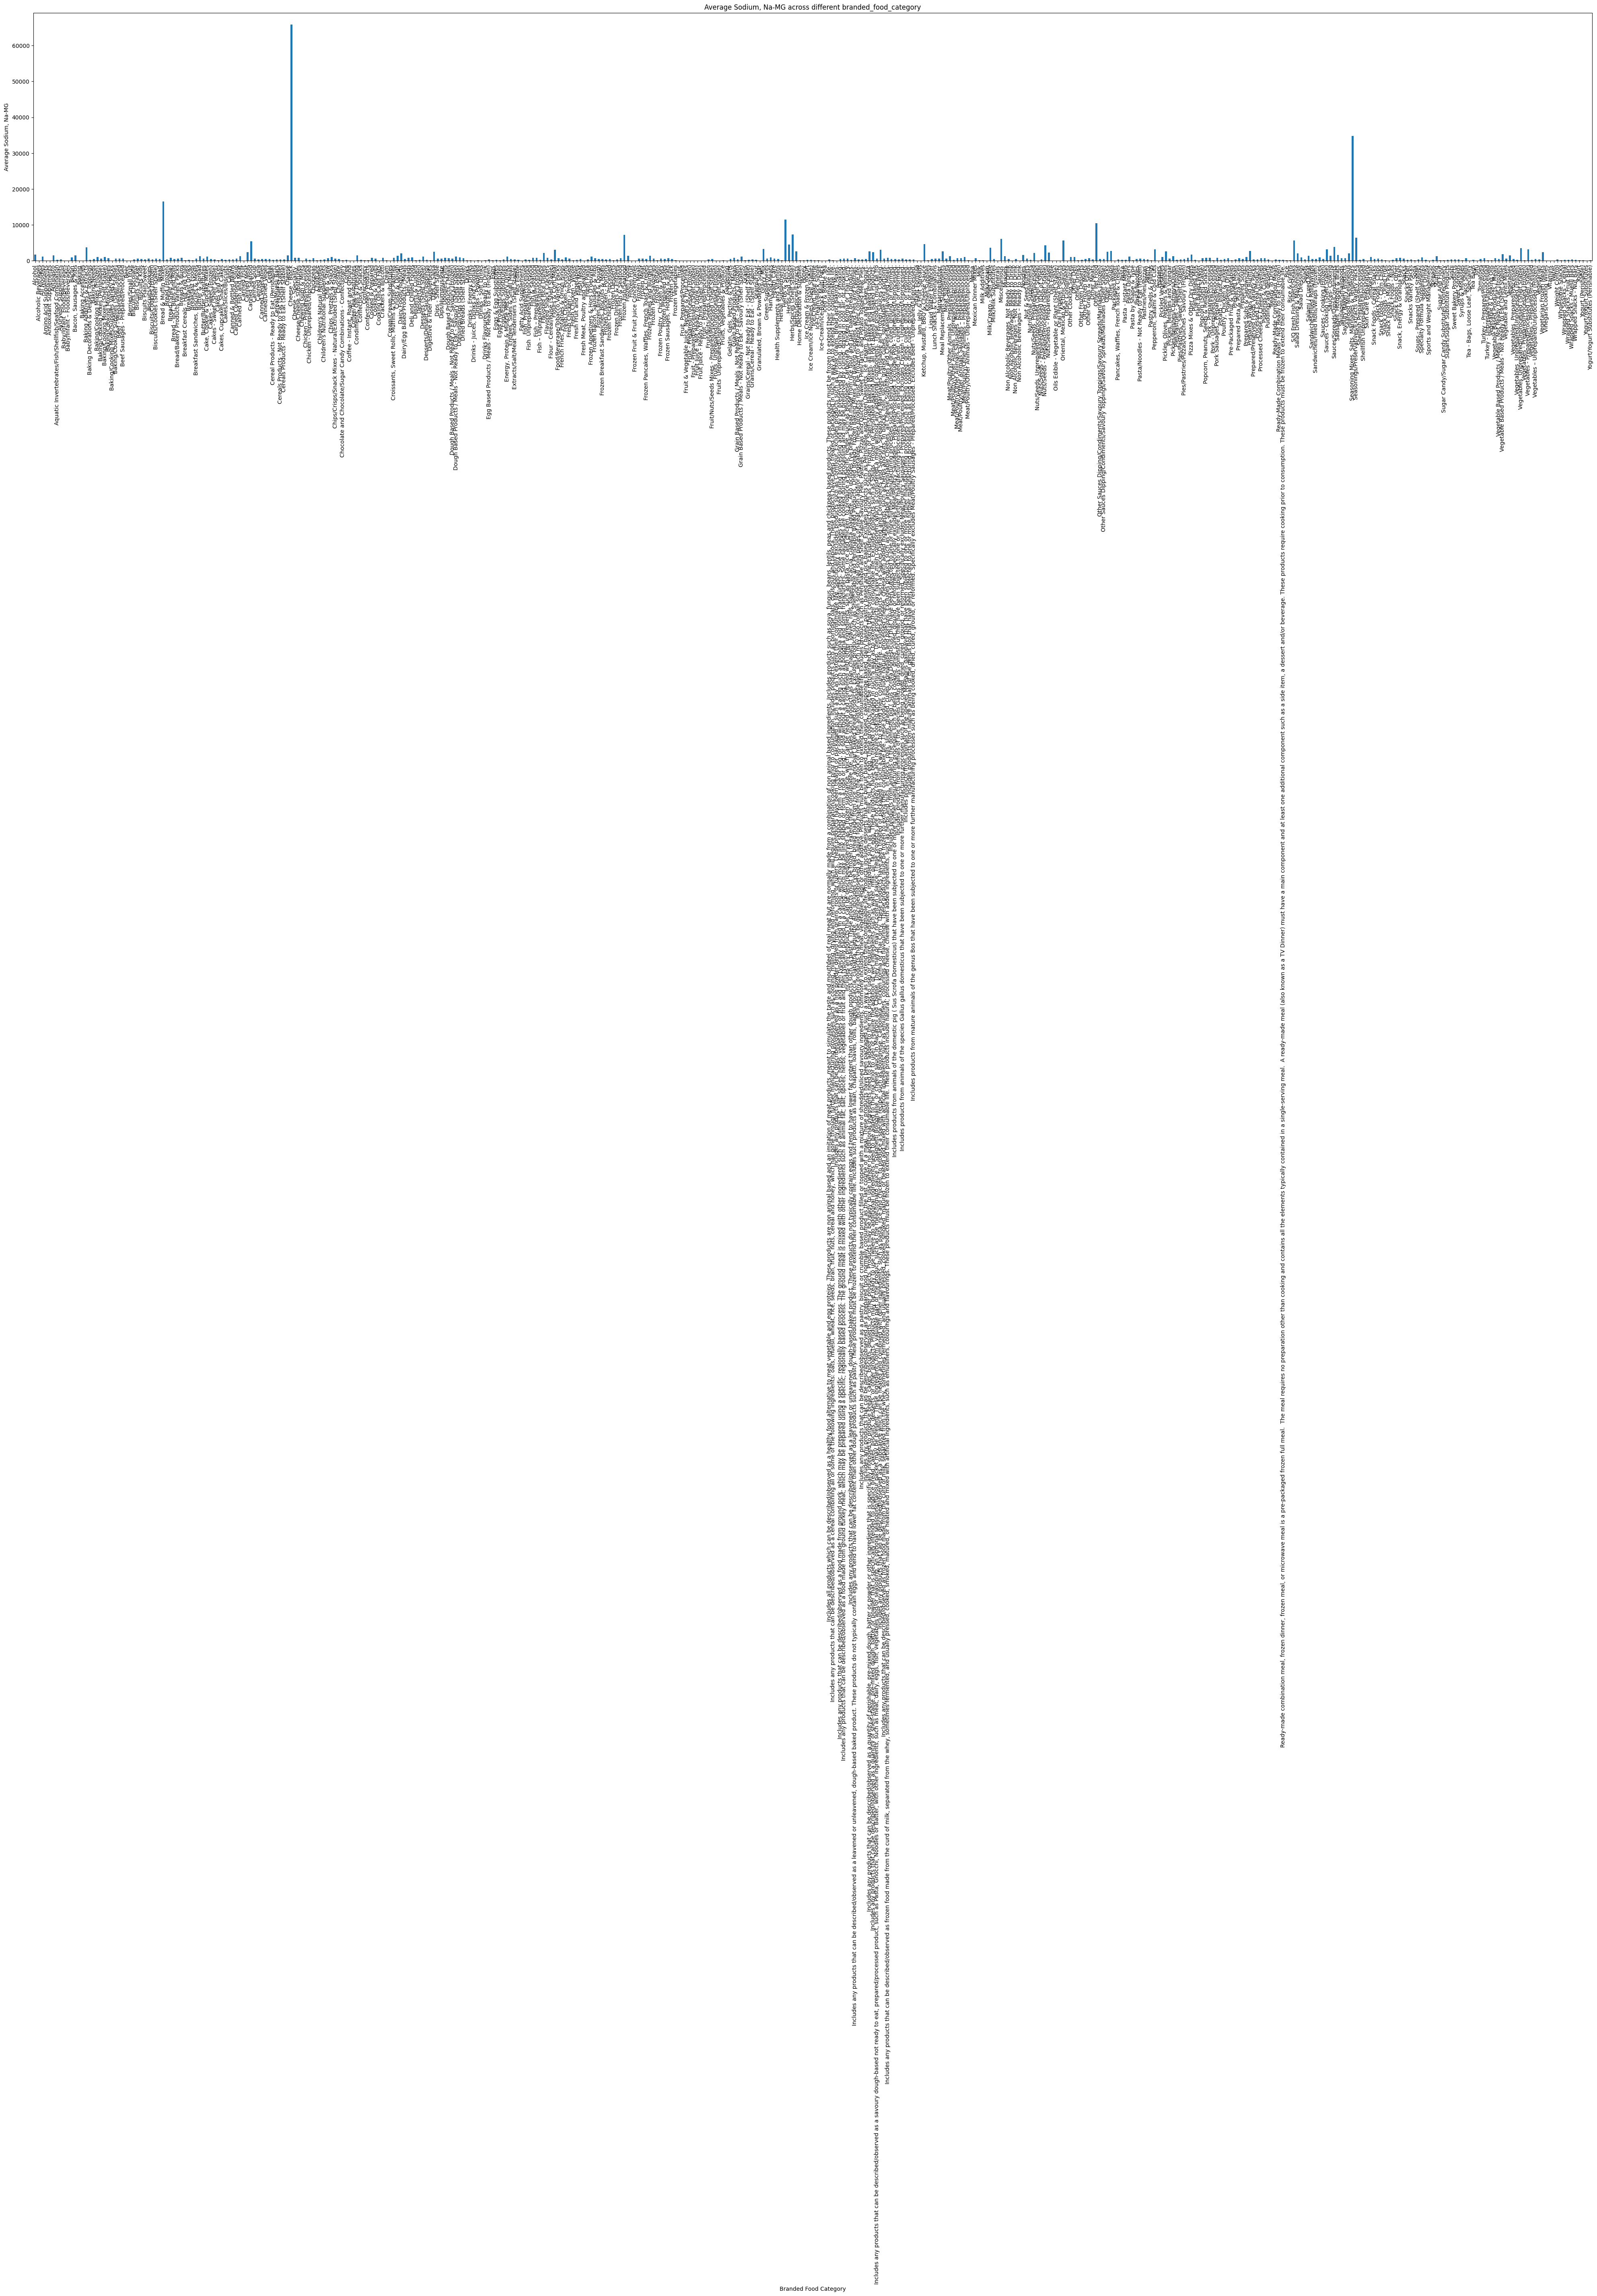

In [164]:
# sodium_avg = food.groupby('branded_food_category')['Sodium, Na-MG'].mean()
# 
# plt.figure(figsize=(50, 8))
# sodium_avg.plot(kind='bar')
# 
# plt.title('Average Sodium, Na-MG across different branded_food_category')
# plt.xlabel('Branded Food Category')
# plt.ylabel('Average Sodium, Na-MG')
# 
# plt.show()

# 5. Plot a pie chart showing the proportion of different serving size units in the dataset.

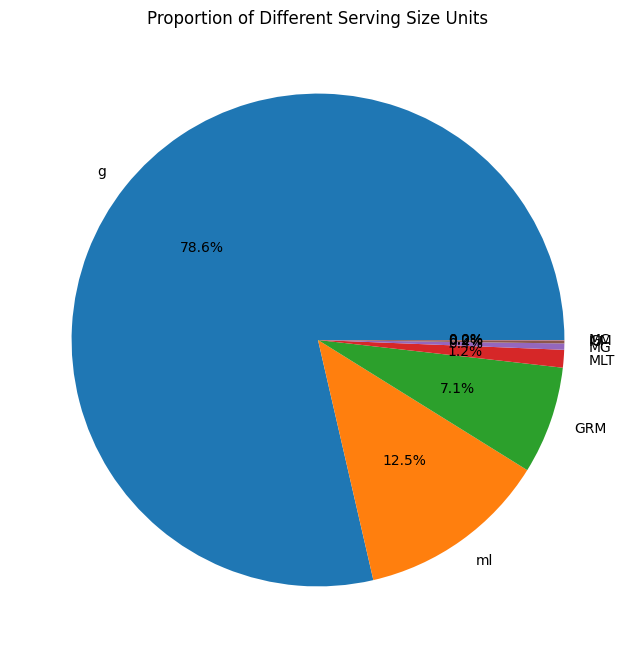

In [166]:
serving_size_units = food['serving_size_unit'].value_counts()

plt.figure(figsize=(10, 8))
serving_size_units.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Different Serving Size Units')
plt.ylabel('')  # Hide the y-axis label

plt.show()

# 6. Use subplots to create histograms for Carbohydrate, by difference-G, Protein-G, and Total sugar alcohols-G.

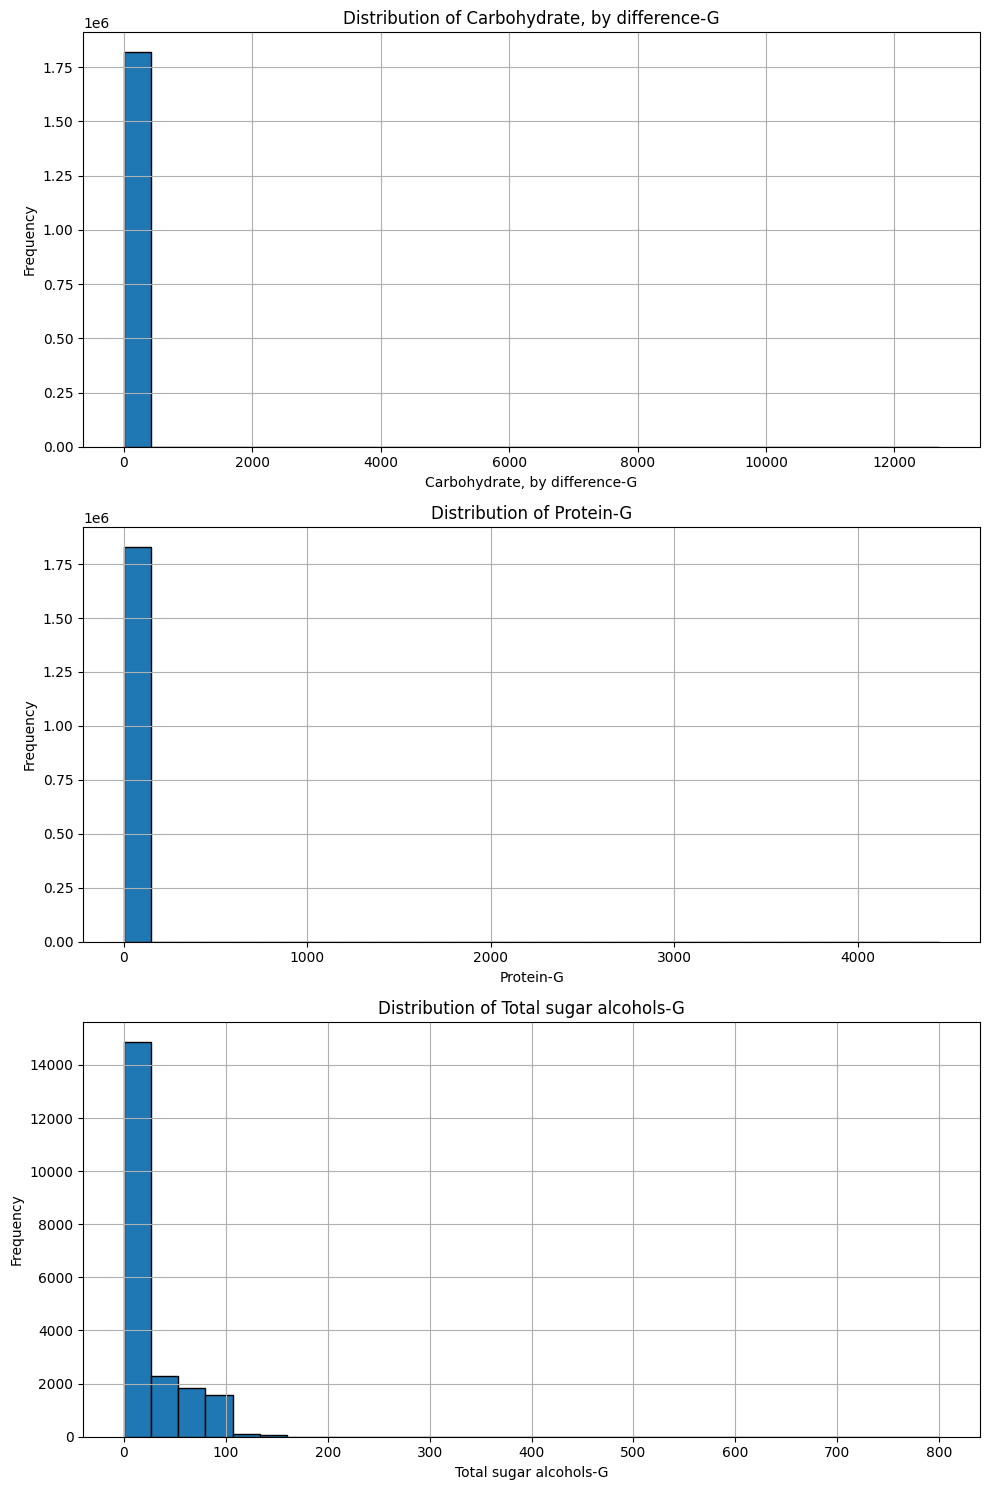

In [167]:
fig, axs = plt.subplots(3, figsize=(10, 15))

# Create a histogram for 'Carbohydrate, by difference-G'
food['Carbohydrate, by difference-G'].hist(ax=axs[0], bins=30, edgecolor='black')
axs[0].set_title('Distribution of Carbohydrate, by difference-G')
axs[0].set_xlabel('Carbohydrate, by difference-G')
axs[0].set_ylabel('Frequency')

# Create a histogram for 'Protein-G'
food['Protein-G'].hist(ax=axs[1], bins=30, edgecolor='black')
axs[1].set_title('Distribution of Protein-G')
axs[1].set_xlabel('Protein-G')
axs[1].set_ylabel('Frequency')

# Create a histogram for 'Total sugar alcohols-G'
food['Total sugar alcohols-G'].hist(ax=axs[2], bins=30, edgecolor='black')
axs[2].set_title('Distribution of Total sugar alcohols-G')
axs[2].set_xlabel('Total sugar alcohols-G')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 7. Create a stacked bar chart of average fats (saturated, monounsaturated, polyunsaturated) per category.

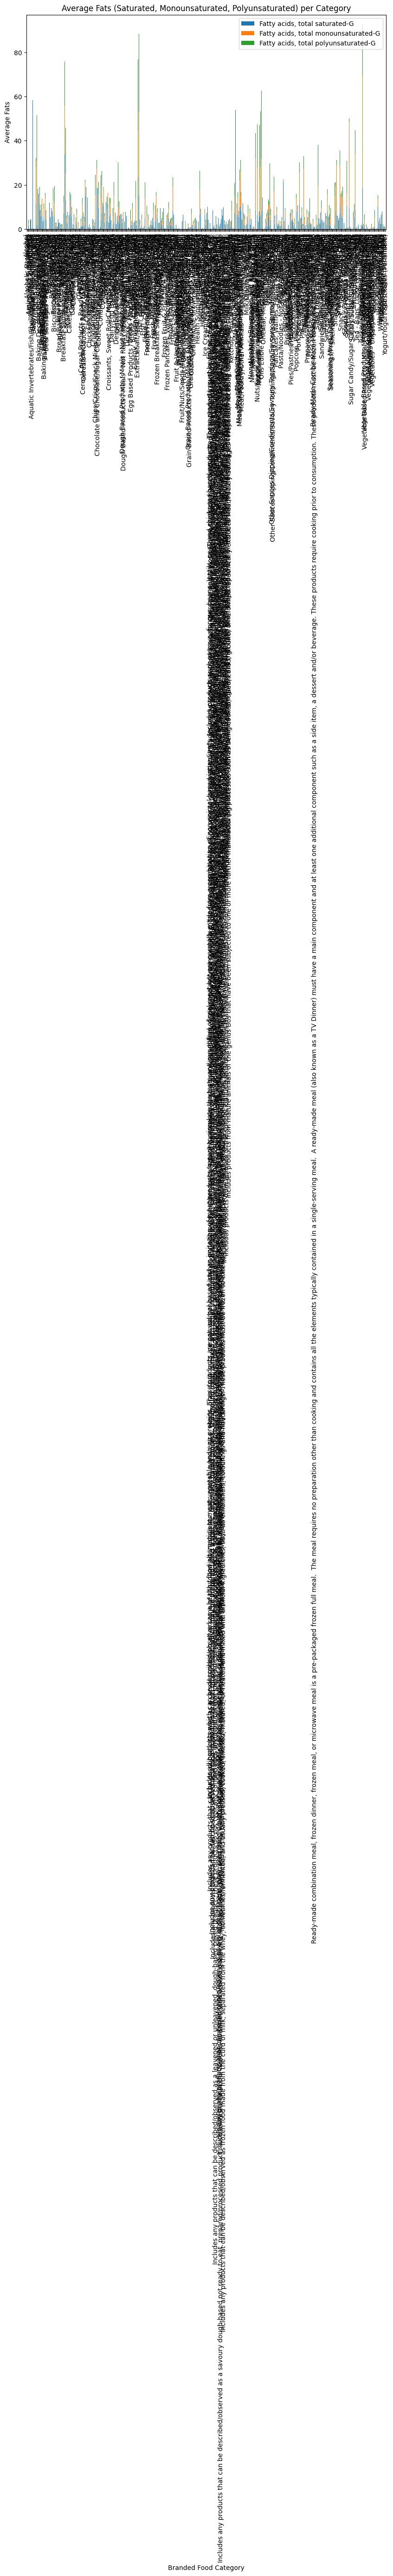

In [168]:
# Group the data by branded_food_category and calculate the mean of fats for each category
fat_avg = food.groupby('branded_food_category')[['Fatty acids, total saturated-G', 'Fatty acids, total monounsaturated-G', 'Fatty acids, total polyunsaturated-G']].mean()

# Plot the average fats for each branded_food_category
fat_avg.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Average Fats (Saturated, Monounsaturated, Polyunsaturated) per Category')
plt.xlabel('Branded Food Category')
plt.ylabel('Average Fats')

plt.show()

# 8. Plot a boxplot for Fiber, total dietary-G to visualize distribution and outliers.

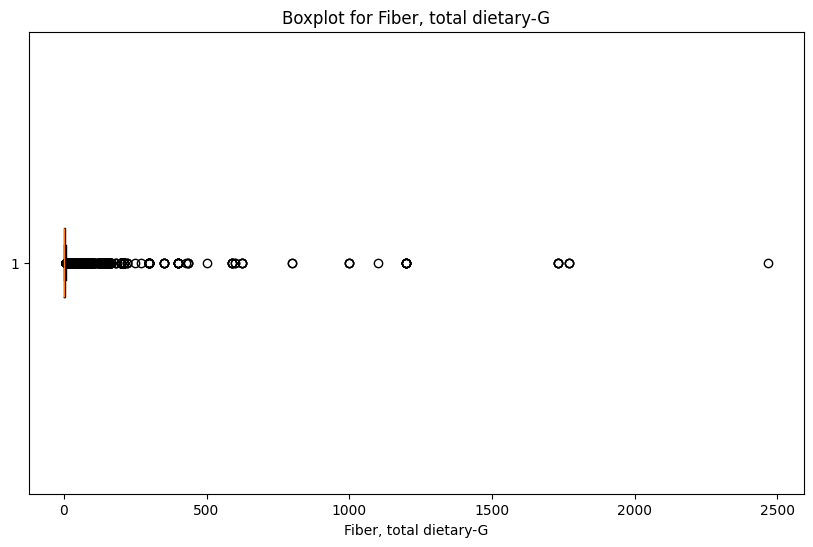

In [169]:
plt.figure(figsize=(10, 6))
plt.boxplot(food['Fiber, total dietary-G'].dropna(), vert=False)  # dropna() is used to remove missing values

plt.title('Boxplot for Fiber, total dietary-G')
plt.xlabel('Fiber, total dietary-G')

plt.show()

# 9. Use a scatter plot matrix to visualize pairwise relationships between Energy-KCAL, Total lipid (fat)-G, Protein-G.

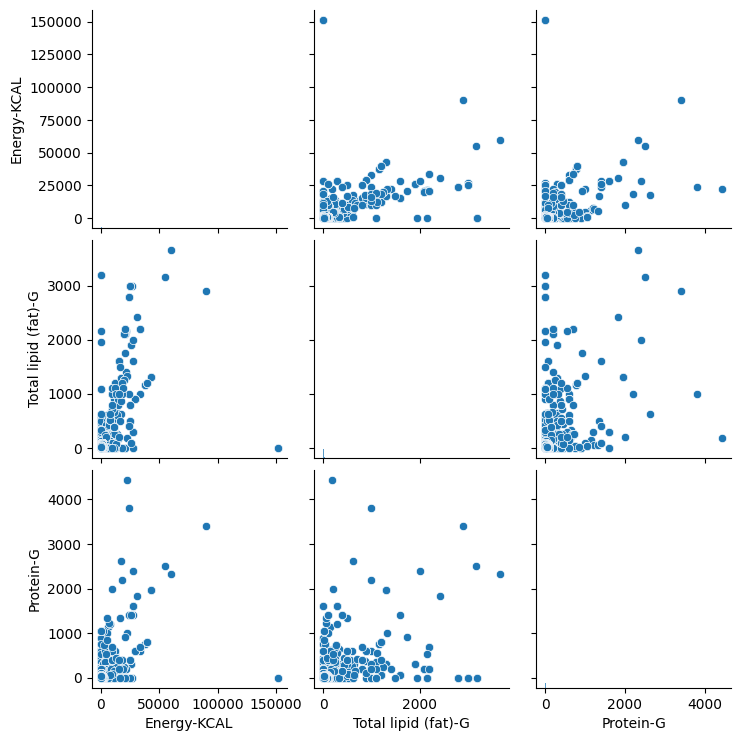

In [170]:
import seaborn as sns

cols = ['Energy-KCAL', 'Total lipid (fat)-G', 'Protein-G']
subset = food[cols]

sns.pairplot(subset)

plt.show()

# 10. Create a time series plot showing the number of products added per month over time.

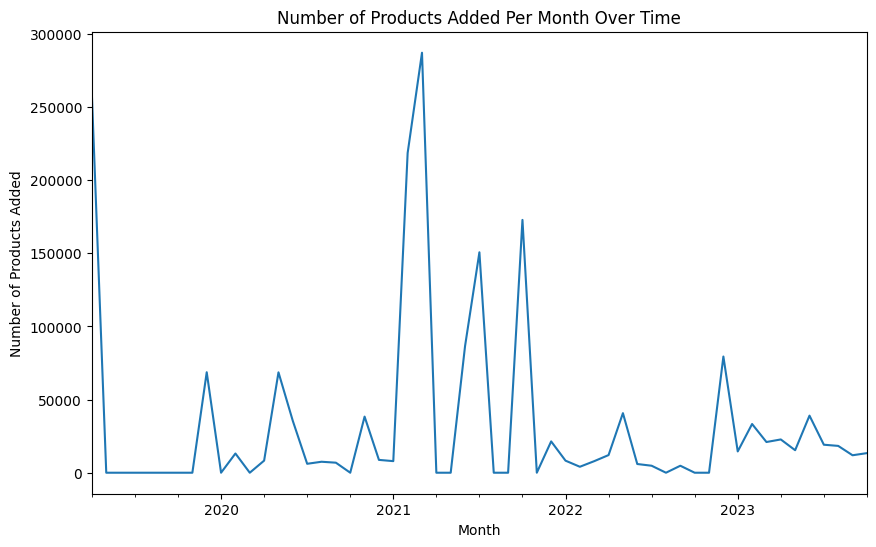

In [172]:
food['available_date'] = pd.to_datetime(food['available_date'])

products_added_per_month = food.resample('ME', on='available_date').size()

products_added_per_month.plot(kind='line', figsize=(10, 6))

plt.title('Number of Products Added Per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Products Added')

plt.show()

# NumPy

# 1. Create a NumPy array from the Energy-KCAL column and compute the mean.

In [182]:
energy_kcal = food['Energy-KCAL'].values

mean_energy_kcal = np.nanmean(energy_kcal)

mean_energy_kcal

274.1806098743401

# 2. Calculate the standard deviation of Protein-G using NumPy.

In [181]:
protein_g = food['Protein-G'].values

std_protein_g = np.nanstd(protein_g)

std_protein_g

14.42789755709291

# 3. Create a NumPy array for Cholesterol-MG and find the maximum value.

In [183]:
cholesterol_mg = food['Cholesterol-MG'].values

max_cholesterol_mg = np.nanmax(cholesterol_mg)

max_cholesterol_mg

5500000.0

# 4. Use NumPy to compute the total sum of Calcium, Ca-MG across all items.

In [187]:
calcium_ca_mg = food['Calcium, Ca-MG'].values

total_calcium_ca_mg = np.nansum(calcium_ca_mg)

total_calcium_ca_mg

245752319.0

# 5. Find the median value of Sodium, Na-MG using NumPy.

In [190]:
sodium_na_mg = food['Sodium, Na-MG'].values

sodium_na_mg_median = np.nanmedian(sodium_na_mg)

sodium_na_mg_median

262.0

# 6. Calculate the variance of Carbohydrate, by difference-G using NumPy.

In [194]:
carbohydrate_by_difference_g = food['Carbohydrate, by difference-G'].values

carbohydrate_by_difference_g_variance  = np.nanvar(carbohydrate_by_difference_g)

carbohydrate_by_difference_g_variance

2466.0357389248325

# 7. Generate a NumPy array with normalized values of Total lipid (fat)-G (subtract mean, divide by standard deviation).

In [197]:
# Convert the 'Total lipid (fat)-G' column to a NumPy array
total_lipid_fat_g = food['Total lipid (fat)-G'].values

# Calculate the mean and standard deviation
mean_total_lipid_fat_g = np.nanmean(total_lipid_fat_g)
std_total_lipid_fat_g = np.nanstd(total_lipid_fat_g)

# Normalize the 'Total lipid (fat)-G' values
normalized_total_lipid_fat_g = (total_lipid_fat_g - mean_total_lipid_fat_g) / std_total_lipid_fat_g

pd.DataFrame(normalized_total_lipid_fat_g)

0
0        3.576711
1       -0.558319
2       -0.323057
3       -0.287170
4       -0.558319
...           ...
1841892  0.391147
1841893  1.213900
1841894  0.918382
1841895  0.770845
1841896  0.153670

[1841897 rows x 1 columns]

# 8. Use a NumPy array to count how many items have Vitamin C, total ascorbic acid-MG greater than 20mg.

In [199]:
vitamin_c_mg = food['Vitamin C, total ascorbic acid-MG'].values

mask = vitamin_c_mg > 20

count = np.count_nonzero(mask)

count

100685

# 9. Create a Boolean index from a NumPy array to filter items with zero trans fats.

In [202]:
trans_fats_g = food['Fatty acids, total trans-G'].values

mask = trans_fats_g == 0

pd.DataFrame(mask)

0
0        True
1        True
2        True
3        True
4        True
...       ...
1841892  True
1841893  True
1841894  True
1841895  True
1841896  True

[1841897 rows x 1 columns]

# 10. Calculate the correlation coefficient between Total lipid (fat)-G and Energy-KCAL using NumPy.

In [205]:
# Convert the 'Total lipid (fat)-G' and 'Energy-KCAL' columns to NumPy arrays
total_lipid_fat_g = food['Total lipid (fat)-G'].values
energy_kcal = food['Energy-KCAL'].values

# Create a mask for non-nan values in both arrays
mask = ~np.isnan(total_lipid_fat_g) & ~np.isnan(energy_kcal)

# Apply the mask to both arrays
total_lipid_fat_g = total_lipid_fat_g[mask]
energy_kcal = energy_kcal[mask]

# Calculate the correlation coefficient
corr_coef = np.corrcoef(total_lipid_fat_g, energy_kcal)

# Since corr_coef is a 2D array, we need to get the off-diagonal element at index [0, 1] or [1, 0]
corr_coef = corr_coef[0, 1]

corr_coef

0.6625443260944736